In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("SugarData.csv")

In [51]:
type(df)

pandas.core.frame.DataFrame

In [53]:
df.head(10)

,STATE,Sugar_yield_acres,Crop_Year,Average_Temp,Average_Precip
0,Florida,3.50,1980,74.80,4.78
1,Florida,3.89,1981,76.90,2.85
2,Florida,3.71,1982,75.07,6.87
3,Florida,3.39,1983,73.13,5.27
4,Florida,3.80,1984,73.93,4.77
5,Florida,3.69,1985,75.50,4.12
6,Florida,3.78,1986,74.47,3.49
7,Florida,3.77,1987,73.77,3.43
8,Florida,3.88,1988,73.97,3.01
9,Florida,3.30,1989,75.07,5.00


In [55]:
df.shape

(52, 5)

In [57]:
df.describe()

,Sugar_yield_acres,Crop_Year,Average_Temp,Average_Precip
count,52.000000,52.000000,52.000000,52.000000
mean,3.477500,1992.500000,74.155192,4.913654
std,0.824673,7.573172,1.491463,1.479734
min,2.020000,1980.000000,70.100000,1.780000
25%,2.867500,1986.000000,73.252500,3.905000
50%,3.440000,1992.500000,74.065000,4.870000
75%,4.015000,1999.000000,75.070000,5.672500
max,5.520000,2005.000000,77.000000,8.220000


In [59]:
df.columns

Index(['STATE', 'Sugar_yield_acres', 'Crop_Year', 'Average_Temp',
       'Average_Precip'],
      dtype='object')

In [107]:
X = df['Average_Temp']
# X = pd.concat([X,df['Average_Precip']],axis=1)

In [109]:
type(X)

pandas.core.series.Series

In [111]:
X = X.to_frame()

In [113]:
Y = df['Sugar_yield_acres']

In [115]:
Y.shape

(52,)

In [117]:
#This is a method of Scikit_Learn helps to split data 
# test_size splits the data 80% for training and 20% for testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state =42, test_size=0.2)


In [119]:
X_train.shape

(41, 1)

In [121]:
Y_train.shape

(41,)

In [123]:
#Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [125]:
Y_pred = model.predict(X_test)

In [127]:
Y_pred

array([3.95554065, 3.10192931, 3.50312664, 3.1616821 , 2.1074721 ,
       3.98541705, 3.34520854, 3.003764  , 2.97388761, 3.30252797,
       3.14460988])

In [129]:
#Importing Performance metrics
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test,Y_pred)

In [131]:
r2

-0.29871877704444394

In [133]:
X_test

,Average_Temp
19,75.43
41,73.43
47,74.37
12,73.57
43,71.10
5,75.50
17,74.00
50,73.20
3,73.13
32,73.90


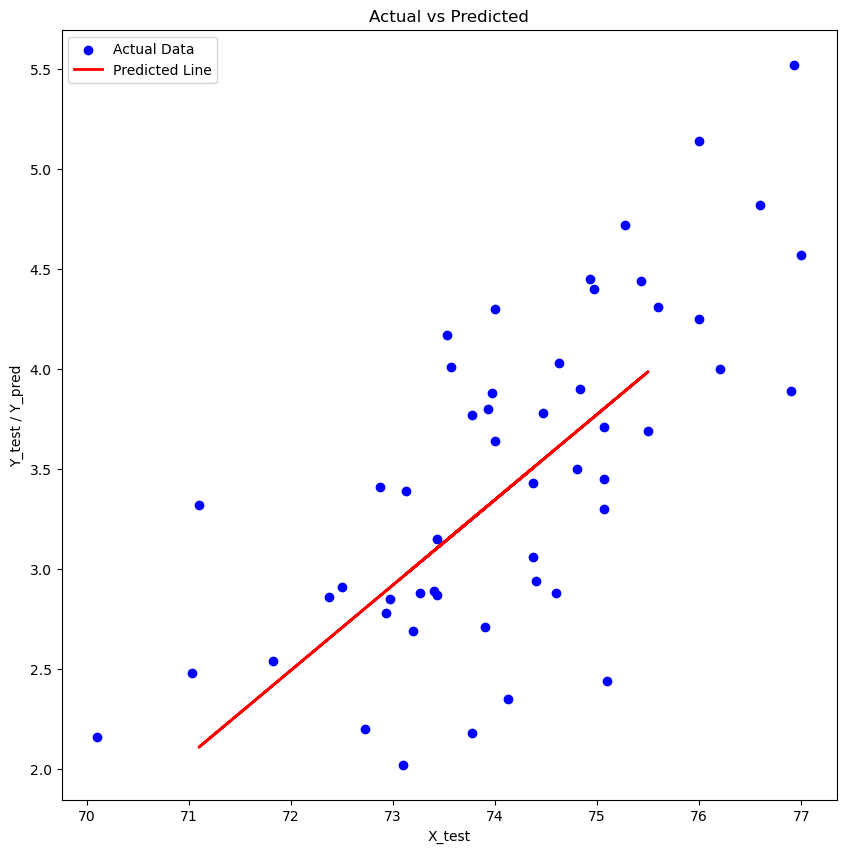

In [139]:
# Set figure size
plt.figure(figsize=(10, 10))

# Scatter plot for actual data
plt.scatter(X, Y, color='blue', label='Actual Data')

# Line plot for predictions
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted Line')

# Add labels and title
plt.xlabel("X_test")
plt.ylabel("Y_test / Y_pred")
plt.title("Actual vs Predicted")

# Add legend
plt.legend()

# Show the combined plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate non-linearly separable data (moons dataset)
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Train a Linear SVM (which will fail)
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X, y)

# Train an SVM with RBF Kernel (which will succeed)
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X, y)

# Plot the decision boundaries
plt.figure(figsize=(12, 5))

# Linear SVM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Linear SVM (Fails)")

# RBF Kernel SVM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("SVM with RBF Kernel (Works)")

plt.show()
